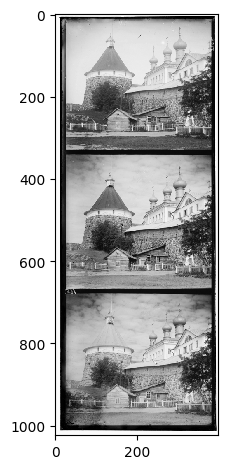

In [178]:
%matplotlib inline
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np

img = imread("prikud/01.png")

img_f = img_as_float(img)

imshow(img_f)
height = int(img_f.shape[0] / 3)

# img1 = img_f[0:height] 
blue, green, red = img_f[0:height], img_f[height:height*2], img_f[height*2:height*3]
# img3 = img_f[height*2:height*3]

(341, 398)

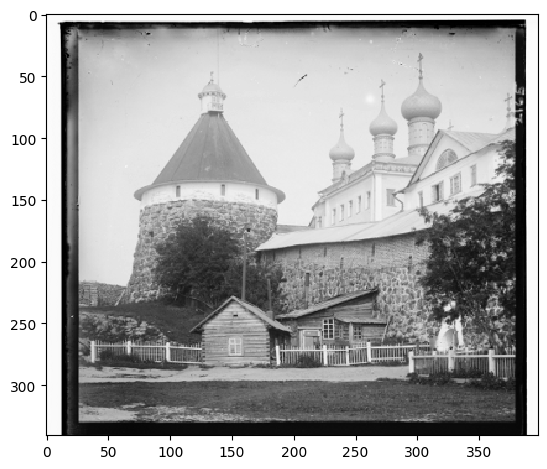

In [179]:
imshow(blue)
blue.shape

(341, 398)

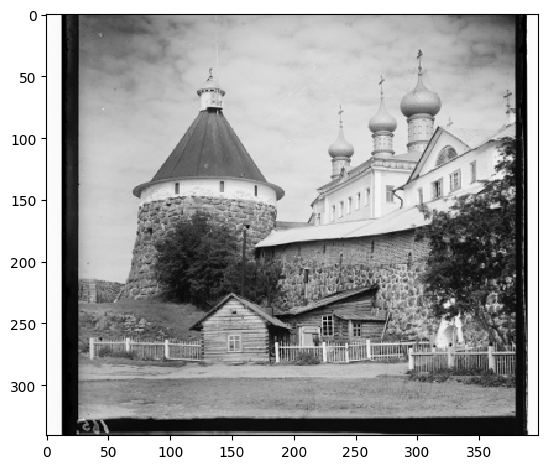

In [180]:
imshow(green)
green.shape

(341, 398)

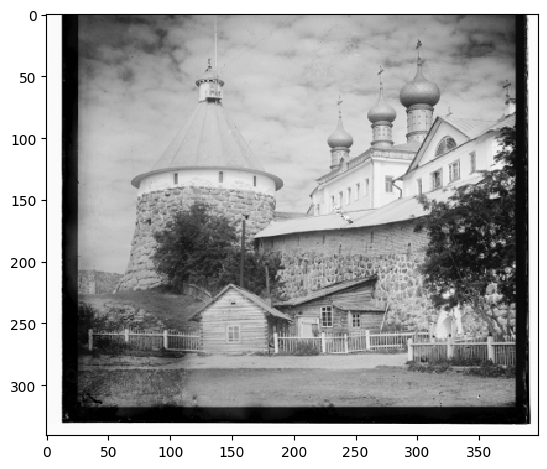

In [181]:
imshow(red)
red.shape

In [182]:
def cut_matrix(matrix, percent_to_remove=0.15):
    # Определяем количество строк и столбцов матрицы
    rows, columns = matrix.shape
    rows, columns = matrix.shape

    # Удаляем 15% краев матрицы
    rows_to_remove = int(rows * percent_to_remove)
    columns_to_remove = int(columns * percent_to_remove)

    trimmed_matrix = matrix[rows_to_remove:rows-rows_to_remove, columns_to_remove:columns-columns_to_remove]

    return trimmed_matrix

In [183]:
blue = cut_matrix(blue)
green = cut_matrix(green)
red = cut_matrix(red)

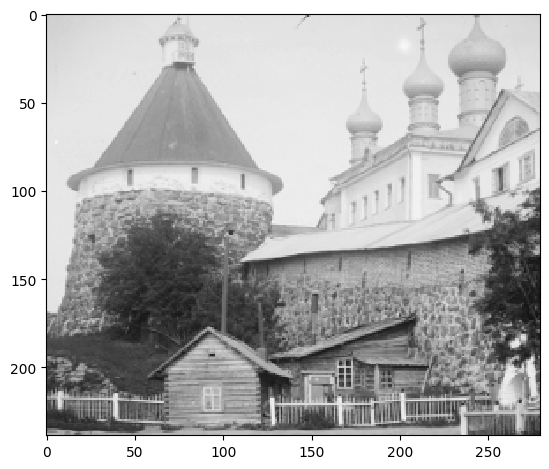

In [184]:
imshow(blue)

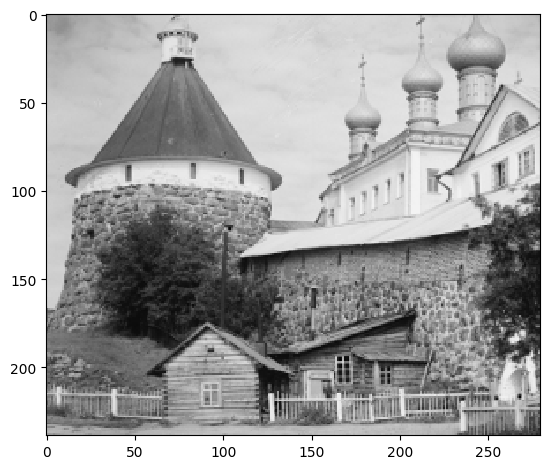

In [185]:
imshow(green)

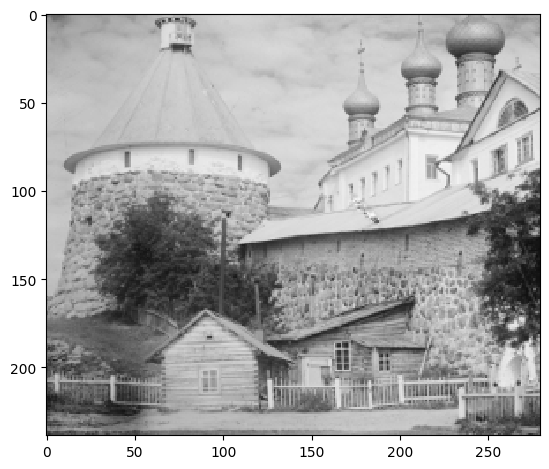

In [186]:
imshow(red)

In [187]:
def get_correction(channel1, channel2):
    y = -15
    x = -15
    best_correlation = -1
    for dx in range(-15, 16):
        for dy in range(-15, 16):
            dxy = np.roll(channel1, dy, axis=0)
            dxy = np.roll(dxy, dx, axis=1)
            correlation = (dxy * channel2).sum()
            if best_correlation < correlation:
                best_correlation = correlation
                y = dy
                x = dx
    channel1 = np.roll(channel1, y, axis=0)
    channel1 = np.roll(channel1, x, axis=1)
    return channel1

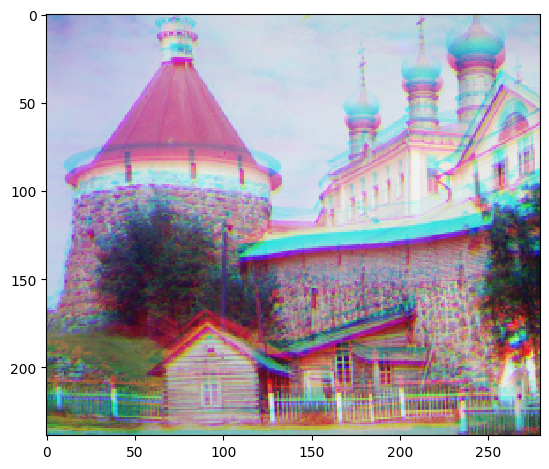

In [188]:
result = np.dstack((red, green, blue))

imshow(result)

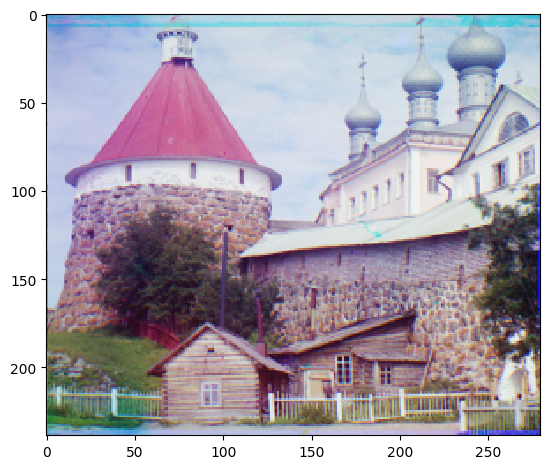

In [189]:
blue = get_correction(blue, green)
red = get_correction(red, green)

new_img = np.dstack((red, green, blue))

imshow(img_as_ubyte(new_img))

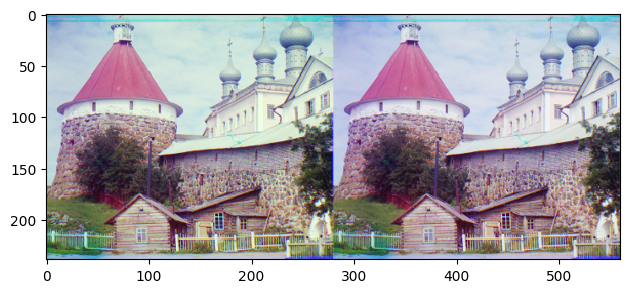

In [190]:
r = new_img[:,:,0]
g = new_img[:,:,1]
b = new_img[:,:,2]

R_av = np.average(r)
G_av = np.average(g)
B_av = np.average(b)
avg = (R_av + G_av + B_av) / 3
r_w = R_av / avg
g_w = G_av / avg
b_w = B_av / avg

r = np.clip(r/r_w, 0, 1)
g = np.clip(g / g_w, 0, 1)
b = np.clip(b / b_w, 0, 1)

imshow(np.hstack((np.dstack((r, g, b)), new_img)))